In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.read_csv("1 year.csv",parse_dates=["date"],dayfirst=True)
dataset.info
dataset.shape


(35060, 8)

In [31]:
from datetime import datetime,date,time
dataset.dropna()

,date,hour,time,purchase bid,sell bid,mcv,fsv,mcp
0,2021-01-01,1,0:00,5757.4,13513.0,4262.7,4262.7,2301.03
1,2021-01-01,1,0:15,5877.1,14487.5,4592.7,4592.7,2300.12
2,2021-01-01,1,0:30,5926.4,15368.5,4679.5,4679.5,2298.10
3,2021-01-01,1,0:45,5956.8,16043.9,4763.1,4763.1,2243.24
4,2021-01-01,2,1:00,6330.8,17019.0,5225.8,5225.8,2131.71
...,...,...,...,...,...,...,...,...
35055,2021-12-31,24,23:15,6044.6,17857.0,4794.5,4794.5,1999.99
35056,2021-12-31,24,23:30,6045.3,18258.6,4805.1,4805.1,1999.85
35057,2021-12-31,24,23:45,6066.3,18787.2,4826.1,4826.1,1999.58
35058,2021-12-31,24,23:45,6066.3,18787.2,4826.1,4826.1,1999.58


In [32]:
for i in range(0,dataset['time'].size):
    dataset.loc[i,'time']=datetime.strptime(dataset.loc[i,'time'], '%H:%M').time()

In [33]:
for i in range (0,dataset['time'].size) :
    dataset.loc[i,'days']=pd.Timestamp.combine((dataset.loc[i,'date']),(dataset.loc[i,'time']))

In [34]:
dataset

,date,hour,time,purchase bid,sell bid,mcv,fsv,mcp,days
0,2021-01-01,1,00:00:00,5757.4,13513.0,4262.7,4262.7,2301.03,2021-01-01 00:00:00
1,2021-01-01,1,00:15:00,5877.1,14487.5,4592.7,4592.7,2300.12,2021-01-01 00:15:00
2,2021-01-01,1,00:30:00,5926.4,15368.5,4679.5,4679.5,2298.10,2021-01-01 00:30:00
3,2021-01-01,1,00:45:00,5956.8,16043.9,4763.1,4763.1,2243.24,2021-01-01 00:45:00
4,2021-01-01,2,01:00:00,6330.8,17019.0,5225.8,5225.8,2131.71,2021-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...
35055,2021-12-31,24,23:15:00,6044.6,17857.0,4794.5,4794.5,1999.99,2021-12-31 23:15:00
35056,2021-12-31,24,23:30:00,6045.3,18258.6,4805.1,4805.1,1999.85,2021-12-31 23:30:00
35057,2021-12-31,24,23:45:00,6066.3,18787.2,4826.1,4826.1,1999.58,2021-12-31 23:45:00
35058,2021-12-31,24,23:45:00,6066.3,18787.2,4826.1,4826.1,1999.58,2021-12-31 23:45:00


In [35]:
dataset.dropna(inplace=True)


In [36]:
dataset=dataset.set_index('days')
dataset=dataset.drop(['time'],axis=1)
dataset=dataset.resample('1H').mean()

<ipython-input-36-c9eda3985d96>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset=dataset.resample('1H').mean()


In [37]:
dataset

,hour,purchase bid,sell bid,mcv,fsv,mcp
days,,,,,,
2021-01-01 00:00:00,1.0,5879.425000,14853.225000,4574.500000,4574.500000,2285.6225
2021-01-01 01:00:00,2.0,6260.400000,17975.975000,5217.875000,5217.875000,2097.2125
2021-01-01 02:00:00,3.0,6269.075000,19207.300000,5314.525000,5314.525000,2008.1925
2021-01-01 03:00:00,4.0,6422.875000,19390.600000,5471.725000,5471.725000,2008.3225
2021-01-01 04:00:00,5.0,6941.500000,19539.450000,5974.500000,5974.500000,2038.7250
...,...,...,...,...,...,...
2021-12-31 19:00:00,20.0,10584.975000,9578.300000,8355.107500,8355.107500,4325.2825
2021-12-31 20:00:00,21.0,8082.525000,10278.075000,6821.060000,6821.060000,3707.3575
2021-12-31 21:00:00,22.0,6482.650000,11622.300000,5307.147500,5307.147500,3012.5650


<Axes: xlabel='days'>

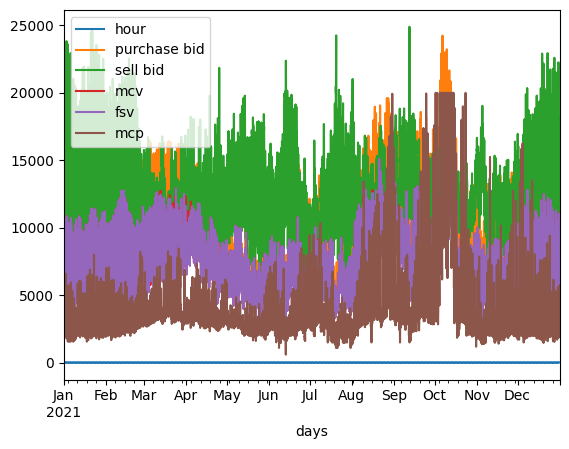

In [38]:
dataset.plot()

In [39]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(dataset['mcp'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mcp):
    result=adfuller(mcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [40]:
adfuller_test(dataset['mcp'])

ADF Test Statistic : -4.009865161378962
p-value : 0.0013597262546974434
#Lags Used : 31
Number of Observations Used : 8728
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


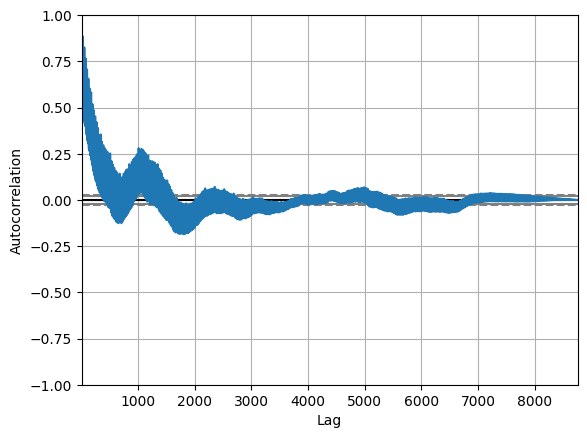

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataset['mcp'])
plt.show()

In [42]:
from google.colab import files
dataset.to_csv('updated_dataset.csv', index=False)
files.download('updated_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

In [44]:
# load dataset
dataset = np.genfromtxt('updated_dataset.csv', delimiter=',', skip_header=1, filling_values=np.nan)
n_features = 6
dataset

array([[1.00000000e+00, 5.87942500e+03, 1.48532250e+04, 4.57450000e+03,
        4.57450000e+03, 2.28562250e+03],
       [2.00000000e+00, 6.26040000e+03, 1.79759750e+04, 5.21787500e+03,
        5.21787500e+03, 2.09721250e+03],
       [3.00000000e+00, 6.26907500e+03, 1.92073000e+04, 5.31452500e+03,
        5.31452500e+03, 2.00819250e+03],
       ...,
       [2.20000000e+01, 6.48265000e+03, 1.16223000e+04, 5.30714750e+03,
        5.30714750e+03, 3.01256500e+03],
       [2.30000000e+01, 5.97385000e+03, 1.41604500e+04, 4.11580000e+03,
        4.11580000e+03, 2.53196250e+03],
       [2.40000000e+01, 6.05008333e+03, 1.82398667e+04, 4.77471667e+03,
        4.77471667e+03, 2.01645500e+03]])

In [45]:
# print the shape and contents of dataset
print('dataset shape:', dataset.shape)
print('dataset contents:', dataset)

dataset shape: (8760, 6)
dataset contents: [[1.00000000e+00 5.87942500e+03 1.48532250e+04 4.57450000e+03
  4.57450000e+03 2.28562250e+03]
 [2.00000000e+00 6.26040000e+03 1.79759750e+04 5.21787500e+03
  5.21787500e+03 2.09721250e+03]
 [3.00000000e+00 6.26907500e+03 1.92073000e+04 5.31452500e+03
  5.31452500e+03 2.00819250e+03]
 ...
 [2.20000000e+01 6.48265000e+03 1.16223000e+04 5.30714750e+03
  5.30714750e+03 3.01256500e+03]
 [2.30000000e+01 5.97385000e+03 1.41604500e+04 4.11580000e+03
  4.11580000e+03 2.53196250e+03]
 [2.40000000e+01 6.05008333e+03 1.82398667e+04 4.77471667e+03
  4.77471667e+03 2.01645500e+03]]


In [46]:
# remove rows with NaN values
dataset = dataset[~np.isnan(dataset).any(axis=1)]
dataset
     

array([[1.00000000e+00, 5.87942500e+03, 1.48532250e+04, 4.57450000e+03,
        4.57450000e+03, 2.28562250e+03],
       [2.00000000e+00, 6.26040000e+03, 1.79759750e+04, 5.21787500e+03,
        5.21787500e+03, 2.09721250e+03],
       [3.00000000e+00, 6.26907500e+03, 1.92073000e+04, 5.31452500e+03,
        5.31452500e+03, 2.00819250e+03],
       ...,
       [2.20000000e+01, 6.48265000e+03, 1.16223000e+04, 5.30714750e+03,
        5.30714750e+03, 3.01256500e+03],
       [2.30000000e+01, 5.97385000e+03, 1.41604500e+04, 4.11580000e+03,
        4.11580000e+03, 2.53196250e+03],
       [2.40000000e+01, 6.05008333e+03, 1.82398667e+04, 4.77471667e+03,
        4.77471667e+03, 2.01645500e+03]])

In [47]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
test
train

array([[1.0000000e+00, 5.8794250e+03, 1.4853225e+04, 4.5745000e+03,
        4.5745000e+03, 2.2856225e+03],
       [2.0000000e+00, 6.2604000e+03, 1.7975975e+04, 5.2178750e+03,
        5.2178750e+03, 2.0972125e+03],
       [3.0000000e+00, 6.2690750e+03, 1.9207300e+04, 5.3145250e+03,
        5.3145250e+03, 2.0081925e+03],
       ...,
       [1.1000000e+01, 1.1239875e+04, 1.5978500e+04, 1.0163375e+04,
        1.0163375e+04, 2.8441150e+03],
       [1.2000000e+01, 1.1001325e+04, 1.5663125e+04, 1.0017775e+04,
        1.0017775e+04, 2.7893275e+03],
       [1.3000000e+01, 1.1008400e+04, 1.5611475e+04, 1.0052550e+04,
        1.0052550e+04, 2.7881100e+03]])

In [48]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [49]:
look_back = 12

In [50]:
# prepare the training data
trainX, trainY = [], []
for i in range(look_back, len(train)):
    trainX.append(train[i-look_back:i, :n_features])
    trainY.append(train[i, n_features - 1])
trainX, trainY = np.array(trainX), np.array(trainY)


In [51]:
# prepare the testing data
testX, testY = [], []
for i in range(look_back, len(test)):
    testX.append(test[i-look_back:i, :n_features])
    testY.append(test[i, n_features - 1])
testX, testY = np.array(testX), np.array(testY)

In [52]:
# build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
# train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)


Epoch 1/10
184/184 - 7s - loss: 0.0046 - val_loss: 0.0126 - 7s/epoch - 40ms/step
Epoch 2/10
184/184 - 2s - loss: 0.0023 - val_loss: 0.0079 - 2s/epoch - 12ms/step
Epoch 3/10
184/184 - 3s - loss: 0.0018 - val_loss: 0.0086 - 3s/epoch - 14ms/step
Epoch 4/10
184/184 - 2s - loss: 0.0015 - val_loss: 0.0085 - 2s/epoch - 11ms/step
Epoch 5/10
184/184 - 3s - loss: 0.0014 - val_loss: 0.0067 - 3s/epoch - 15ms/step
Epoch 6/10
184/184 - 3s - loss: 0.0014 - val_loss: 0.0076 - 3s/epoch - 15ms/step
Epoch 7/10
184/184 - 2s - loss: 0.0013 - val_loss: 0.0080 - 2s/epoch - 12ms/step
Epoch 8/10
184/184 - 2s - loss: 0.0013 - val_loss: 0.0063 - 2s/epoch - 12ms/step
Epoch 9/10
184/184 - 2s - loss: 0.0013 - val_loss: 0.0066 - 2s/epoch - 12ms/step
Epoch 10/10
184/184 - 3s - loss: 0.0013 - val_loss: 0.0066 - 3s/epoch - 16ms/step


In [54]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

90/90 [==============================] - 0s 5ms/step


In [55]:
# calculate the root mean squared error
trainScore = np.sqrt(np.mean(np.square(trainY[0] - trainPredict[:,0])))
print('Train RMSE: %.2f' % (trainScore))
testScore = np.sqrt(np.mean(np.square(testY[0] - testPredict[:,0])))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 0.08
Test RMSE: 0.17


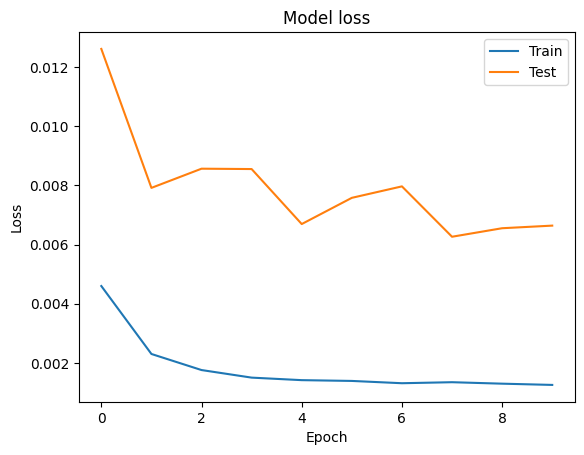

In [56]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

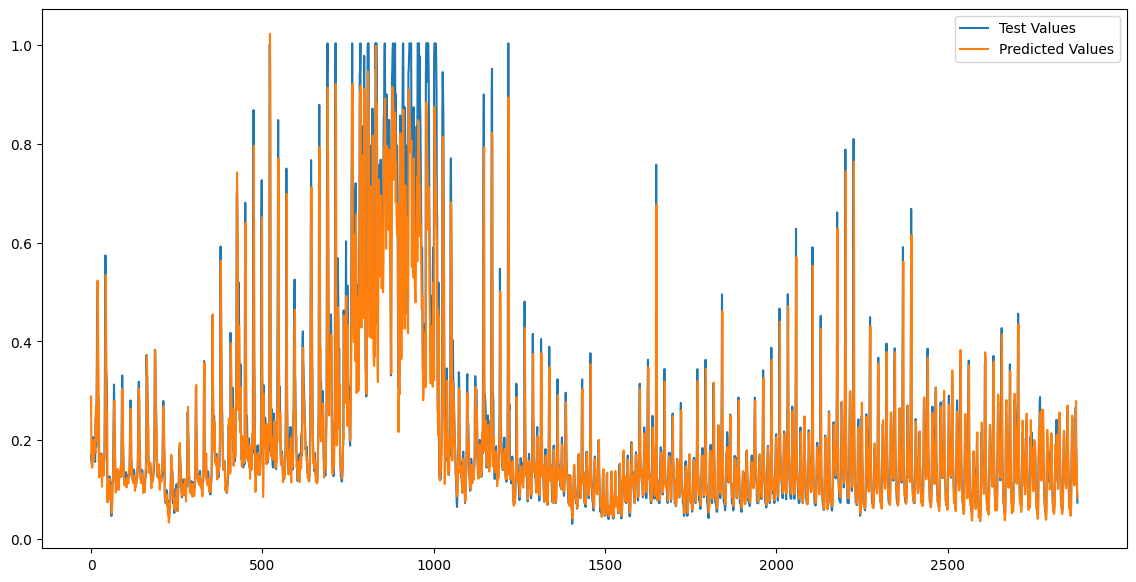

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(testY, label='Test Values')
plt.plot(testPredict, label='Predicted Values')
plt.legend()
plt.xticks(range(0, len(testY), 500))  
plt.show()

In [58]:
print('dataset shape:', dataset.shape)
print('train shape:', train.shape)


dataset shape: (8760, 6)
train shape: (5869, 6)


In [59]:
# Get the last 'look_back' days of data from the dataset
input_data = dataset[-look_back:, :n_features]

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Reshape the input data to match the model's input shape
input_data_reshaped = np.reshape(input_data_scaled, (1, look_back, n_features))

# Predict the (n+1)th day price
predicted_price_scaled = model.predict(input_data_reshaped)

# Inverse transform the predicted price
predicted_price = scaler.inverse_transform([[0] * (n_features - 1) + [predicted_price_scaled[0, 0]]])

# Print the predicted price for the (n+1)th day
print('Predicted price for (n+1)th day:', predicted_price[0][-1])

1/1 [==============================] - 0s 26ms/step
Predicted price for (n+1)th day: 1624.6402364855262
